In [3]:
import pandas as pd
# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

In [4]:
google = pd.read_csv('strata_data-master/data/goog.csv', index_col='Date', parse_dates = True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [5]:
# Reading data from the Web
from pandas_datareader import data as pd_data

start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2014-12-31')
google = pd_data.DataReader("GOOG", 'google', start, end)

NotImplementedError: data_source='google' is not implemented

In [ ]:
# Skipping execution on everything dealing with the google object since it doesn't work
# He just goes over simple pandas inspection/slicing.

# Filtering:
# google_up = google[google['Close'] > google['Open']]
# google_filtered = google[pd.isnull(google['Volume']) == False]

# Statistics:
# google.describe()

# Computations:
# google['Return'] = google['Close'].pct_change()

# import numpy as np
# google['LogReturn'] = np.log(1 + google['Return'])

# Visualizations:
#google[['Close', 'Volatility']].plot(subplots = True, figsize=(15, 6))

In [6]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

pd.__version__

'1.0.1'

In [7]:
file = "strata_data-master/data/exoplanets.csv"
data = pd.read_csv(file)
series = data['NAME']

print('\n')
print(series)

print('\n')
print(type(series))



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
             ...      
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [8]:
new_list = [5, 10, 15, 20, 25]
pd.Series(new_list)
# Can also do this with dictionaries

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [9]:
from collections import OrderedDict
od = OrderedDict([('b', 100), ('a', 200), ('d', 450), ('c', 700)])
pd.Series(od)

b    100
a    200
d    450
c    700
dtype: int64

In [10]:
array1 = np.arange(1.6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=2, step=1)

In [11]:
print(series1.iloc[0])

0.0


In [12]:
index2 = ['a', 'b']
series2 = pd.Series(np.arange(1.6)*20.0, index = index2)

In [13]:
series2.loc['a']

0.0

In [14]:
for key, value in series2.iteritems():
    print(key, value)

a 0.0
b 20.0


In [15]:
print(series2.loc['a':'b'])
# when indexing with labels, endpoint is INCLUSIVE

a     0.0
b    20.0
dtype: float64


In [16]:
series2.loc['a':'b':2]

a    0.0
dtype: float64

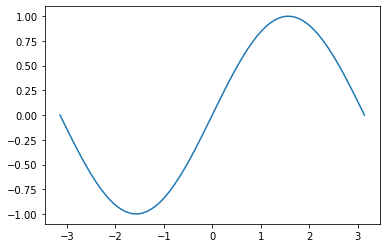

In [17]:
# Series Arithmetic
series_2pi = pd.Series(np.linspace(-1*np.pi, 1*np.pi, 100))
series_sine = np.sin(series_2pi)
plt.plot(series_2pi, series_sine)

In [18]:
series1 = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
series2 = pd.Series([10, 20, 30], index = ['d', 'c', 'a'])
print(series1 + series2)
# pandas defaults to outer join

a    31.0
b     NaN
c    23.0
d     NaN
dtype: float64


In [19]:
pd.concat([series1, series2], axis = 1)

,0,1
a,1.0,30.0
b,2.0,NaN
c,3.0,20.0
d,NaN,10.0


In [20]:
# Creating a DataFrame from a rile read:

df_file = pd.read_csv("strata_data-master/data/exoplanets.csv")
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [23]:
# Creating a DataFrame from a dict

dict = {'a': list(range(1, 11)), 'b': np.linspace(0, np.pi, 10), 'c': 0.0}
df_dict = pd.DataFrame(dict)
df_dict

,a,b,c
0,1,0.000000,0.0
1,2,0.349066,0.0
2,3,0.698132,0.0
3,4,1.047198,0.0
...,...,...,...
6,7,2.094395,0.0
7,8,2.443461,0.0
8,9,2.792527,0.0
9,10,3.141593,0.0


In [24]:
df_grades = pd.DataFrame({'Alice': [1,2,3,4,5], 
                          'Bob': np.random.random(5), 
                          'Chuck': np.random.random(5)}, index = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.447658,0.659729
Feb,2,0.609750,0.167520
Mar,3,0.769481,0.784822
Apr,4,0.434920,0.871278
May,5,0.358700,0.390696


In [27]:
# Indexing is by column first(gives a series)
series_a = df_grades['Alice']
# Indexing the column name, gives a Series, then 'positional' indexing
print(df_grades['Alice'].iloc[1])
# Or label' indexing
df_grades.loc['Jan', 'Alice']

2


1

In [28]:
# Iterating over a DataFrame:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)


Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5


In [29]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ' Row:', '%s' % row['Alice'])

Index: Jan  Row: 1.0
Index: Feb  Row: 2.0
Index: Mar  Row: 3.0
Index: Apr  Row: 4.0
Index: May  Row: 5.0


In [30]:
df_grades[['Alice']] # returns a DataFrame instead of Series

,Alice
Jan,1
Feb,2
Mar,3
Apr,4
May,5


In [33]:
df_col = df_grades[['Alice']]
df_row = df_grades.loc['Jan':'Jan']
print(df_row, '\n', type(df_row))

     Alice       Bob     Chuck
Jan      1  0.447658  0.659729 
 <class 'pandas.core.frame.DataFrame'>


In [35]:
# pd.Series(df_row) doesn't work
# pd.Series? # pop-open info
pd.Series(df_row.loc['Jan'])

In [36]:
# Can slice along rows just as. you can with columns
# Matrix operations should use numpy

In [41]:
# Create a temporary directory
import os
if (not os.path.exists('tmp')):
    os.mkdir('tmp')
    
# Define a convenience func to help us clean up
def clean_tmp(file_name='tmp/exoplanet.csv'):
    if (os.path.isfile(file_name)):
        os.remove(file_name)

In [44]:
data

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [46]:
data = pd.read_csv('strata_data-master/data/exoplanets.csv', parse_dates = True, index_col = 'DATE')
data.head(10)

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
1988-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1989-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1992-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN
1992-01-01,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1995-01-01,51 Peg b,Mayor 1995,http://adsabs.harvard.edu/abs/1995Natur.378..355M,256.0,...,+22:57:27.85,+20:46:07.26,1.054000,1.024510
1996-01-01,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,NaN,...,+10:59:28.22,+40:25:48.44,1.063000,1.118690
1996-01-01,70 Vir b,Marcy 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.147M,74.0,...,+13:28:25.95,+13:46:48.68,1.101000,1.597750
1997-01-01,16 Cyg B b,Cochran 1997,http://adsabs.harvard.edu/abs/1997ApJ...483..457C,95.0,...,+19:41:52.10,+50:31:04.51,0.956000,1.117600


In [47]:
data.index

DatetimeIndex(['1988-01-01', '1989-01-01', '1992-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1996-01-01', '1997-01-01',
               ...
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01'],
              dtype='datetime64[ns]', name='DATE', length=1642, freq=None)

In [48]:
# You can sort by the Index
data = data.set_index(data.index.sort_values(ascending = False))
data.iloc[:3]

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
2015-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2015-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN


In [49]:
data.columns

Index(['NAME', 'FIRSTREF', 'FIRSTURL', 'NUM_OBS', 'MASS(mjupiter)',
       'RADIUS(rjupiter)', 'PERIOD(day)', 'ECCENTRICITY',
       'SEMI_MAJOR_AXIS(AU)', 'SEPARATION(AU)', 'STAR_NAME', 'DIST(PARSEC)',
       'RA_STRING(h:m:s)', 'DEC_STRING(d:m:s)', 'STAR_MASS(msun)',
       'STAR_RADIUS(rsun)'],
      dtype='object')

In [51]:
data['RADIUS(rjupiter)']

DATE
2015-01-01     NaN
2015-01-01     NaN
2015-01-01     NaN
2015-01-01     NaN
              ... 
1992-01-01    1.04
1992-01-01     NaN
1989-01-01     NaN
1988-01-01     NaN
Name: RADIUS(rjupiter), Length: 1642, dtype: float64

In [55]:
# Deleting Columns
#del data['FIRSTURL']
# Rename
data = data.rename(columns={'NAME':'PLANET'})
data.iloc[:5]

,PLANET,FIRSTREF,NUM_OBS,MASS(mjupiter),...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,131.0,1.517280,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
2015-01-01,HD 114762 b,Latham 1989,74.0,11.635100,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2015-01-01,PSR B1257+12 B,Wolszczan 1992,NaN,0.013531,...,13:00:03.577,+12:40:56.4,NaN,NaN
2015-01-01,PSR B1257+12 A,Wolszczan 1992,NaN,0.000063,...,13:00:03.577,+12:40:56.4,NaN,NaN
2015-01-01,beta Gem b,Hatzes 1993,55.0,2.758220,...,+07:45:19.36,+28:01:34.72,2.080000,8.156090


In [57]:
 # File formats
print(''.join(['pd.%s\n' % reader for reader in dir(pd) if reader.startswith('read_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table



In [60]:
# Data Frame casting
print(''.join(['pd.DataFrame.%s\n' % reader for reader in dir(pd.DataFrame) if reader.startswith('to_')]))

pd.DataFrame.to_clipboard
pd.DataFrame.to_csv
pd.DataFrame.to_dict
pd.DataFrame.to_excel
pd.DataFrame.to_feather
pd.DataFrame.to_gbq
pd.DataFrame.to_hdf
pd.DataFrame.to_html
pd.DataFrame.to_json
pd.DataFrame.to_latex
pd.DataFrame.to_markdown
pd.DataFrame.to_numpy
pd.DataFrame.to_parquet
pd.DataFrame.to_period
pd.DataFrame.to_pickle
pd.DataFrame.to_records
pd.DataFrame.to_sql
pd.DataFrame.to_stata
pd.DataFrame.to_string
pd.DataFrame.to_timestamp
pd.DataFrame.to_xarray



In [ ]:
# Write to (xls, SQLite, json) file and read it back in

In [63]:
df = pd.read_csv('strata_data-master/data/beer2.csv.gz', index_col = 0, parse_dates=['time'])
df.head()

,abv,beer_id,brewer_id,beer_name,...,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,...,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,...,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,...,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                48389 non-null  float64       
 1   beer_id            50000 non-null  int64         
 2   brewer_id          50000 non-null  int64         
 3   beer_name          50000 non-null  object        
 4   beer_style         50000 non-null  object        
 5   review_appearance  50000 non-null  float64       
 6   review_aroma       50000 non-null  float64       
 7   review_overall     50000 non-null  float64       
 8   review_palate      50000 non-null  float64       
 9   profile_name       50000 non-null  object        
 10  review_taste       50000 non-null  float64       
 11  text               49991 non-null  object        
 12  time               50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory 

In [65]:
df.describe()

,abv,beer_id,brewer_id,review_appearance,review_aroma,review_overall,review_palate,review_taste
count,48389.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,7.232406,25379.008540,3505.655420,3.874010,3.778880,3.84982,3.778840,3.832480
std,2.387132,20600.374872,5696.746136,0.596153,0.677396,0.70716,0.660929,0.711728
min,0.010000,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,5.400000,2652.000000,147.000000,3.500000,3.500000,3.50000,3.500000,3.500000
50%,6.700000,25880.000000,583.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,8.600000,46302.000000,3694.000000,4.000000,4.000000,4.50000,4.000000,4.500000
max,27.000000,68386.000000,27039.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [66]:
# attribute style (only for getting, not setting) column access:
df.beer_style

0                          American Stout
1                         American Porter
2                         German Pilsener
3          American Double / Imperial IPA
                       ...               
49996      American Double / Imperial IPA
49997    American Double / Imperial Stout
49998                    English Pale Ale
49999              Russian Imperial Stout
Name: beer_style, Length: 50000, dtype: object

In [67]:
# String Operations
df.beer_style.str[0:4]

0        Amer
1        Amer
2        Germ
3        Amer
         ... 
49996    Amer
49997    Amer
49998    Engl
49999    Russ
Name: beer_style, Length: 50000, dtype: object

In [69]:
df.beer_style.str.contains('[A|a]merican')

0         True
1         True
2        False
3         True
         ...  
49996     True
49997     True
49998    False
49999    False
Name: beer_style, Length: 50000, dtype: bool

In [70]:
# Extract rows that map to true
boolean_mask = df.beer_style.str.contains('[A|a]merican')
df.beer_style[boolean_mask]

0                          American Stout
1                         American Porter
3          American Double / Imperial IPA
4                 American Pale Ale (APA)
                       ...               
49990    American Double / Imperial Stout
49991                  American Brown Ale
49996      American Double / Imperial IPA
49997    American Double / Imperial Stout
Name: beer_style, Length: 21380, dtype: object

In [71]:
df.time

0       2009-10-05 21:31:48
1       2009-10-05 21:32:09
2       2009-10-05 21:32:13
3       2009-10-05 21:32:37
                ...        
49996   2009-12-25 17:23:24
49997   2009-12-25 17:23:52
49998   2009-12-25 17:25:06
49999   2009-12-25 17:26:06
Name: time, Length: 50000, dtype: datetime64[ns]

In [72]:
df.time.dt.date
# df.time.dt.time, hour, etc.

0        2009-10-05
1        2009-10-05
2        2009-10-05
3        2009-10-05
            ...    
49996    2009-12-25
49997    2009-12-25
49998    2009-12-25
49999    2009-12-25
Name: time, Length: 50000, dtype: object

In [73]:
df.ix[:2, 'beer_name'] # integer and label-based indexing
# not working for me

AttributeError: 'DataFrame' object has no attribute 'ix'

In [74]:
# Combination of values provides a unique index
reviews = df.set_index(['profile_name', 'beer_id', 'time']).sort_index()
reviews.head(5)

abv  brewer_id  \
profile_name beer_id time                                  
01121987     29077   2009-11-30 03:44:42  9.0      11256   
05Harley     1307    2009-10-06 00:10:06  8.5        428   
             2732    2009-12-12 01:21:36  8.0        287   
             2899    2009-10-20 22:27:01  7.1        911   
             3054    2009-11-21 02:17:41  5.0        946   

                                                              beer_name  \
profile_name beer_id time                                                 
01121987     29077   2009-11-30 03:44:42                 Corne De Brume   
05Harley     1307    2009-10-06 00:10:06                Der Weisse Bock   
             2732    2009-12-12 01:21:36  Bell's Consecrator Doppelbock   
             2899    2009-10-20 22:27:01    Andechser Doppelbock Dunkel   
             3054    2009-11-21 02:17:41               Piton Lager Beer   

                                                      beer_style  ...  \
profile_name beer_id time                                         ...   
01121987     29077   2009-11-30 03:44:42  Scotch Ale / Wee Heavy  ...   
05Harley     1307    2009-10-06 00:10:06              Weizenbock  ...   
             2732    2009-12-12 01:21:36              Doppelbock  ...   
             2899    2009-10-20 22:27:01              Doppelbock  ...   
             3054    2009-11-21 02:17:41  American Adjunct Lager  ...   

                                          review_overall  review_palate  \
profile_name beer_id time                                                 
01121987     29077   2009-11-30 03:44:42             5.0            4.0   
05Harley     1307    2009-10-06 00:10:06             4.0            4.0   
             2732    2009-12-12 01:21:36             4.0            4.0   
             2899    2009-10-20 22:27:01             5.0            4.0   
             3054    2009-11-21 02:17:41             3.0            2.0   

                                          review_taste  \
profile_name beer_id time                                
01121987     29077   2009-11-30 03:44:42           3.5   
05Harley     1307    2009-10-06 00:10:06           4.0   
             2732    2009-12-12 01:21:36           4.5   
             2899    2009-10-20 22:27:01           5.0   
             3054    2009-11-21 02:17:41           3.0   

                                                                                       text  
profile_name beer_id time                                                                    
01121987     29077   2009-11-30 03:44:42   Poured into a belgian beer glass, not great h...  
05Harley     1307    2009-10-06 00:10:06   Can't find the date on this one.\t\tPurchased...  
             2732    2009-12-12 01:21:36   Bottle # 8881 (02/09)\t\tPurchased through We...  
             2899    2009-10-20 22:27:01   Bottle # 300310\t\tPurchased through Kracked ...  
             3054    2009-11-21 02:17:41   Bottled in 2007.\t\tPurchased in St. Lucia @ ...  

[5 rows x 10 columns]

In [75]:
# Convert to categorical column (save memory)
df['beer_style'] = df['beer_style'].astype('category')
df[['beer_style']].info()
# For categorical columns, have .cat (analogous to .dt and .str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   beer_style  50000 non-null  category
dtypes: category(1)
memory usage: 445.3 KB


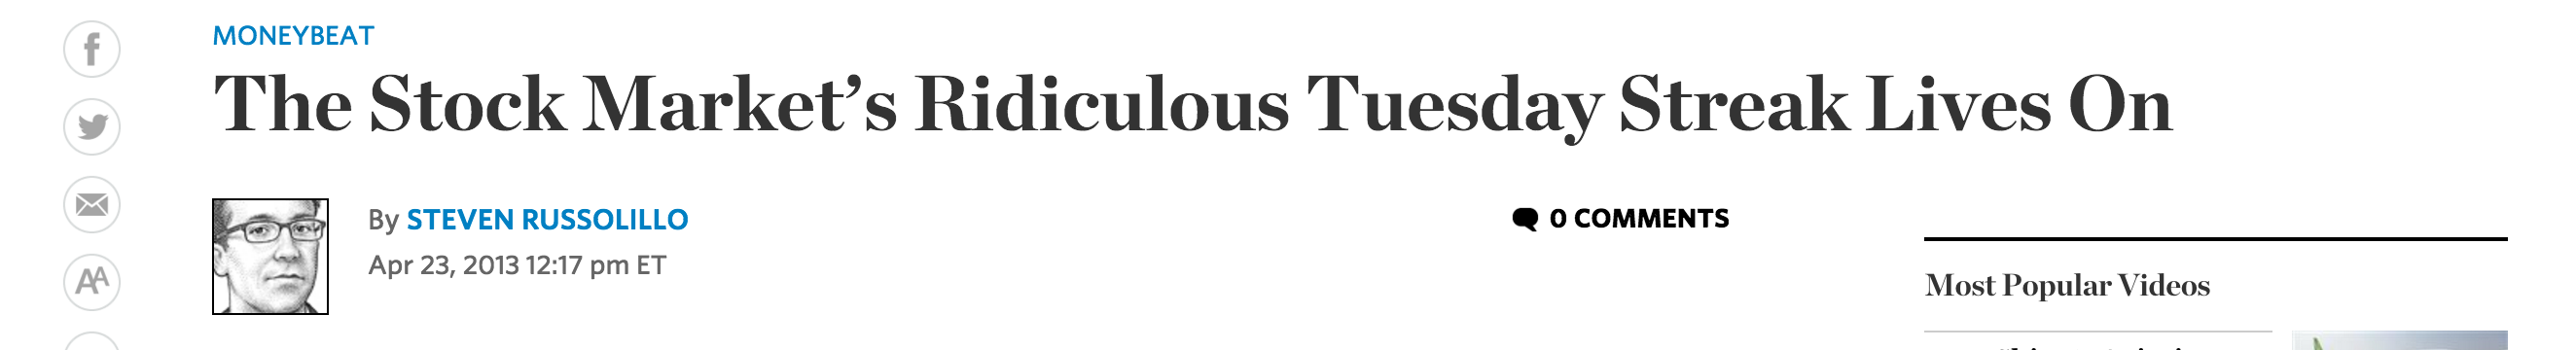

In [76]:
# Turning Tuesdays
from IPython.display import Image
Image(filename='strata_data-master/img/wsj_turnaround_tuesday.png')

In [77]:
sp500 = pd.read_csv('strata_data-master/data/table.csv', index_col = 0, parse_dates = True)
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,4607290000,1923.670044
2016-01-08,1985.319946,1985.319946,1918.459961,1922.030029,4664940000,1922.030029
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961


In [79]:
sptt = sp500[['Adj Close']]
sptt.head()

,Adj Close
Date,
2016-01-11,1923.670044
2016-01-08,1922.030029
2016-01-07,1943.089966
2016-01-06,1990.260010
2016-01-05,2016.709961


In [80]:
def rel_change(x):
    return (x[0] - x[1])/x[1]

In [81]:
sptt.assign?

In [82]:
sptt = sptt.assign(UpDown=pd.rolling_apply(sptt, 2, rel_change)) # Creates UpDown column
# Doesn't work with my pandas, no 'rolling_apply' attribute

AttributeError: module 'pandas' has no attribute 'rolling_apply'

In [83]:
#sptt.UpDown.shift(-1)

In [84]:
sptt.index

DatetimeIndex(['2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04', '2015-12-31', '2015-12-30',
               '2015-12-29', '2015-12-28',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16613, freq=None)

In [85]:
sptt['day_num'] = sptt.index.dayofweek

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
sptt.head()

,Adj Close,day_num
Date,,
2016-01-11,1923.670044,0
2016-01-08,1922.030029,4
2016-01-07,1943.089966,3
2016-01-06,1990.260010,2
2016-01-05,2016.709961,1


In [87]:
sptt['Adj Close'].groupby(sptt.index.dayofweek).mean()

Date
0    478.334693
1    487.397694
2    487.905133
3    485.221006
4    484.926614
Name: Adj Close, dtype: float64

In [88]:
def last_three_days_down(x):
    if (x[1] <= 0 and x[2] <= 0 and x[3] <= 0):
        return 1
    else:
        return 0

In [89]:
#sptt['ltdd'] = pd.rolling_apply(sptt['UpDown'], 4, last_three_days_down).shift(-3)

In [90]:
sptt['turned'] = (sptt['ltdd'] > 0.) & (sptt['UpDown'] > 0.)

KeyError: 'ltdd'

In [91]:
sp_turning_days_totals = sptt.turned.groupby(sptt.index.dayofweek).sum()

AttributeError: 'DataFrame' object has no attribute 'turned'

In [ ]:
#sp_turning_days_totals.plot()